## Objectives
1. To Identify top 10 causes of road accidents in Chicago
2. To determine whether the physical condition of a driver may impact the likelihood of them causing a road accident
3. To investigate how crash frequency and severity differ by presence and type of traffic control devices


### Carrying out necessary imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

## Data Loading

Loading the three datasests, checking the first five rows, columns info, statistics, and dropping columns that are not necessary for prediction of primary contributors to crashes.

##### Crash Dataset



In [38]:
crashes = pd.read_csv("data\Traffic_Crashes_-_Crashes.csv.gz")
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,NaN,12/30/2025 11:50:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,0.0,1.0,1.0,0.0,23,3,12,41.743702,-87.624186,POINT (-87.624185929083 41.743702317364)
1,b938fbfa86d8b2d58d26656bf3266bc5452af63bd100ad...,NaN,12/30/2025 11:21:00 PM,30,UNKNOWN,UNKNOWN,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,23,3,12,41.853734,-87.653792,POINT (-87.653792075361 41.85373399224)
2,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,NaN,12/30/2025 10:55:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,3,12,41.906573,-87.687268,POINT (-87.687268089375 41.906573215648)
3,40064b1f9d498293c9392d4c89bb60128409738a3c44d1...,NaN,12/30/2025 10:51:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,0.0,1.0,3.0,0.0,22,3,12,41.807373,-87.622931,POINT (-87.622930554709 41.807373001937)
4,efce3ab254c9daaacb6ce6a60e10e8cb8ca50ab3f7ea5b...,NaN,12/30/2025 10:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,22,3,12,41.928409,-87.702567,POINT (-87.702567230162 41.928408615992)


In [39]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54959 entries, 0 to 54958
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                54959 non-null  object 
 1   CRASH_DATE_EST_I               3503 non-null   object 
 2   CRASH_DATE                     54959 non-null  object 
 3   POSTED_SPEED_LIMIT             54959 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         54959 non-null  object 
 5   DEVICE_CONDITION               54959 non-null  object 
 6   WEATHER_CONDITION              54959 non-null  object 
 7   LIGHTING_CONDITION             54959 non-null  object 
 8   FIRST_CRASH_TYPE               54959 non-null  object 
 9   TRAFFICWAY_TYPE                54959 non-null  object 
 10  LANE_CNT                       6 non-null      float64
 11  ALIGNMENT                      54959 non-null  object 
 12  ROADWAY_SURFACE_COND           54959 non-null 

In [40]:
crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,54959.000000,6.00000,54959.000000,54959.000000,54959.000000,54854.000000,54854.000000,54854.000000,54854.000000,54854.000000,54854.000000,54854.0,54959.000000,54959.000000,54959.000000,54401.000000,54401.000000
mean,28.416329,3.00000,3641.048400,1274.461035,2.032915,0.237084,0.000966,0.016899,0.122671,0.096547,1.951416,0.0,13.117160,4.082734,9.386615,41.856150,-87.669265
std,5.566449,1.67332,2798.151399,702.797283,0.424157,0.628183,0.034410,0.148113,0.443796,0.406335,1.117474,0.0,5.582133,1.977496,1.703051,0.482557,0.996301
min,0.000000,2.00000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,7.000000,0.000000,-87.939678
25%,30.000000,2.00000,1300.000000,735.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,8.000000,41.790118,-87.722244
50%,30.000000,2.00000,3198.000000,1222.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,9.000000,41.877935,-87.675881
75%,30.000000,3.50000,5464.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,11.000000,41.928488,-87.635917
max,65.000000,6.00000,13799.000000,6100.000000,14.000000,16.000000,2.000000,4.000000,9.000000,11.000000,36.000000,0.0,23.000000,7.000000,12.000000,42.022669,0.000000


In [41]:
crashes.duplicated().sum()

0

In [42]:
crashes.isna().sum()

CRASH_RECORD_ID                      0
CRASH_DATE_EST_I                 51456
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                         54953
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                       2505
CRASH_TYPE                           0
INTERSECTION_RELATED_I           42355
NOT_RIGHT_OF_WAY_I               52823
HIT_AND_RUN_I                    37623
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION                     0
STREET_NAME              

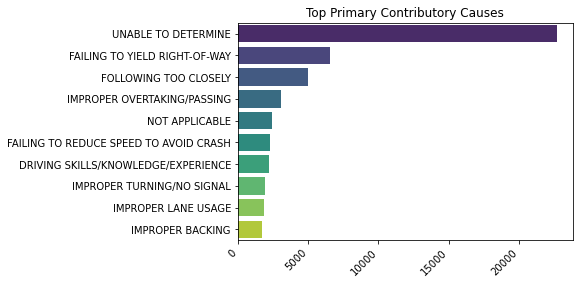

In [ ]:
#Determining the top 
top_10_crash_causes = top_causes = crashes["PRIM_CONTRIBUTORY_CAUSE"].value_counts().head(10)

# Create a barplot
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")

# Add title and rotate x labels for readability
plt.title("Top Primary Contributory Causes")
plt.xticks(rotation=45, ha="right")
plt.show()

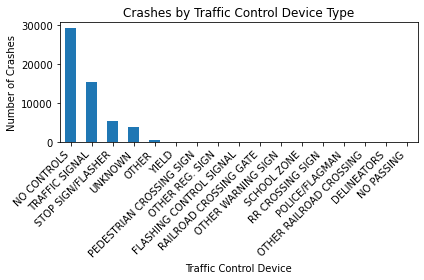

In [58]:
plt.figure()
crashes["TRAFFIC_CONTROL_DEVICE"].value_counts().plot(kind="bar")
plt.title("Crashes by Traffic Control Device Type")
plt.xlabel("Traffic Control Device")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


A high number of accidents occured in areas with no controls(road signs, speed limits, pedestrian crossing etc.)

In [44]:
people = pd.read_csv("data\Traffic_Crashes_-_People.csv.gz")
people.head()

c:\Users\This pc\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O2218091,DRIVER,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,2114560.0,12/30/2025 11:50:00 PM,NaN,CHICAGO,IL,60617,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O2218092,DRIVER,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,2114556.0,12/30/2025 11:50:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O2218087,DRIVER,b938fbfa86d8b2d58d26656bf3266bc5452af63bd100ad...,2114554.0,12/30/2025 11:21:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O2218080,DRIVER,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,2114549.0,12/30/2025 10:55:00 PM,NaN,CHICAGO,IL,60660,M,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O2218081,DRIVER,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,2114552.0,12/30/2025 10:55:00 PM,NaN,CHICAGO,IL,60618,M,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [45]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120061 entries, 0 to 120060
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              120061 non-null  object 
 1   PERSON_TYPE            120061 non-null  object 
 2   CRASH_RECORD_ID        120061 non-null  object 
 3   VEHICLE_ID             116677 non-null  float64
 4   CRASH_DATE             120061 non-null  object 
 5   SEAT_NO                23368 non-null   float64
 6   CITY                   87732 non-null   object 
 7   STATE                  89192 non-null   object 
 8   ZIPCODE                83249 non-null   object 
 9   SEX                    117848 non-null  object 
 10  AGE                    86279 non-null   float64
 11  DRIVERS_LICENSE_STATE  71646 non-null   object 
 12  DRIVERS_LICENSE_CLASS  56520 non-null   object 
 13  SAFETY_EQUIPMENT       119761 non-null  object 
 14  AIRBAG_DEPLOYED        116809 non-nu

In [46]:
people.duplicated().sum()

0

In [47]:
people.isna().sum()

PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
VEHICLE_ID                 3384
CRASH_DATE                    0
SEAT_NO                   96693
CITY                      32329
STATE                     30869
ZIPCODE                   36812
SEX                        2213
AGE                       33782
DRIVERS_LICENSE_STATE     48415
DRIVERS_LICENSE_CLASS     63541
SAFETY_EQUIPMENT            300
AIRBAG_DEPLOYED            3252
EJECTION                   1738
INJURY_CLASSIFICATION        13
HOSPITAL                 105315
EMS_AGENCY               111164
EMS_RUN_NO               118551
DRIVER_ACTION             23580
DRIVER_VISION             23627
PHYSICAL_CONDITION        23513
PEDPEDAL_ACTION          116736
PEDPEDAL_VISIBILITY      116743
PEDPEDAL_LOCATION        116738
BAC_RESULT                23615
BAC_RESULT VALUE         119954
CELL_PHONE_USE           120059
dtype: int64

In [48]:
people["PHYSICAL_CONDITION"].value_counts()

NORMAL                          58425
UNKNOWN                         36085
EMOTIONAL                         604
IMPAIRED - ALCOHOL                382
REMOVED BY EMS                    342
OTHER                             253
FATIGUED/ASLEEP                   241
ILLNESS/FAINTED                    88
HAD BEEN DRINKING                  50
IMPAIRED - ALCOHOL AND DRUGS       38
IMPAIRED - DRUGS                   28
MEDICATED                          12
Name: PHYSICAL_CONDITION, dtype: int64

In [49]:
vehicles = pd.read_csv("data\Traffic_Crashes_-_Vehicles.csv.gz")
vehicles.head()

c:\Users\This pc\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,39,40,41,47,48,49,57,58,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,2218091,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,12/30/2025 11:50:00 PM,2,DRIVER,NaN,2114560.0,NaN,HYUNDAI,ELANTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2218092,d4532856f89a7311fb6182ffef7cd3c27fdba4dba40671...,12/30/2025 11:50:00 PM,1,DRIVER,NaN,2114556.0,NaN,UNKNOWN,OTHER (EXPLAIN IN NARRATIVE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2218087,b938fbfa86d8b2d58d26656bf3266bc5452af63bd100ad...,12/30/2025 11:21:00 PM,1,DRIVER,NaN,2114554.0,NaN,GENERAL MOTORS CORPORATION (GMC),OTHER (EXPLAIN IN NARRATIVE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2218080,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,12/30/2025 10:55:00 PM,1,DRIVER,NaN,2114549.0,NaN,LEXUS,RX400H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2218081,bb8c152ed4e0d29961e051b7d381508f1f9ea5aa051dbe...,12/30/2025 10:55:00 PM,2,DRIVER,NaN,2114552.0,NaN,CHEVROLET,MALIBU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
vehicles["EXCEED_SPEED_LIMIT_I"].value_counts()

N    1
Name: EXCEED_SPEED_LIMIT_I, dtype: int64

In [51]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111727 entries, 0 to 111726
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CRASH_UNIT_ID             111727 non-null  int64  
 1   CRASH_RECORD_ID           111727 non-null  object 
 2   CRASH_DATE                111727 non-null  object 
 3   UNIT_NO                   111727 non-null  int64  
 4   UNIT_TYPE                 111651 non-null  object 
 5   NUM_PASSENGERS            16020 non-null   float64
 6   VEHICLE_ID                108262 non-null  float64
 7   CMRC_VEH_I                2030 non-null    object 
 8   MAKE                      108262 non-null  object 
 9   MODEL                     108262 non-null  object 
 10  LIC_PLATE_STATE           98787 non-null   object 
 11  VEHICLE_YEAR              93284 non-null   float64
 12  VEHICLE_DEFECT            108262 non-null  object 
 13  VEHICLE_TYPE              108262 non-null  o